In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### PROBLEM STATEMENT



In [128]:
# to predict market values of each player given the input variables.

### DATA GATHERING

In [129]:
df = pd.read_csv("epldata_final.csv")

In [130]:
df.head()

name     club  age position  position_cat  market_value  \
0     Alexis Sanchez  Arsenal   28       LW             1          65.0   
1         Mesut Ozil  Arsenal   28       AM             1          50.0   
2          Petr Cech  Arsenal   35       GK             4           7.0   
3       Theo Walcott  Arsenal   28       RW             1          20.0   
4  Laurent Koscielny  Arsenal   31       CB             3          22.0   

   page_views  fpl_value fpl_sel  fpl_points  region     nationality  \
0        4329       12.0  17.10%         264     3.0           Chile   
1        4395        9.5   5.60%         167     2.0         Germany   
2        1529        5.5   5.90%         134     2.0  Czech Republic   
3        2393        7.5   1.50%         122     1.0         England   
4         912        6.0   0.70%         121     2.0          France   

   new_foreign  age_cat  club_id  big_club  new_signing  
0            0        4        1         1            0  
1            0        4        1         1            0  
2            0        6        1         1            0  
3            0        4        1         1            0  
4            0        4        1         1            0

### EDA

In [131]:
df.sample(10)

name               club  age position  position_cat  \
381         Jan Vertonghen          Tottenham   30       CB             3   
454         Angelo Ogbonna           West+Ham   29       CB             3   
447        Darren Randolph           West+Ham   30       GK             4   
280          Sergio Romero  Manchester+United   30       GK             4   
325              Josh Sims        Southampton   20       RW             1   
154  Dominic Calvert-Lewin            Everton   20       SS             1   
334         Ryan Shawcross         Stoke+City   29       CB             3   
306         Fraser Forster        Southampton   29       GK             4   
122             Scott Dann     Crystal+Palace   30       CB             3   
310          Cedric Soares        Southampton   25       RB             3   

     market_value  page_views  fpl_value fpl_sel  fpl_points  region  \
381          28.0         511        6.0   9.00%         126     2.0   
454           9.0         247        4.5   1.10%          45     2.0   
447           2.5         459        4.5   0.40%          69     2.0   
280           6.0         849        5.0   0.20%          23     3.0   
325           0.5         126        4.5   0.10%          12     1.0   
154           3.5         343        5.0   0.30%          17     1.0   
334          11.0         281        5.0   1.00%          94     2.0   
306          15.0         548        5.0   7.30%         134     1.0   
122           5.0         217        5.0   1.10%          61     1.0   
310          15.0         338        5.0  16.40%         102     2.0   

    nationality  new_foreign  age_cat  club_id  big_club  new_signing  
381     Belgium            0        4       17         1            0  
454       Italy            0        4       20         0            0  
447     Ireland            0        4       20         0            0  
280   Argentina            0        4       12         1            0  
325     England            0        1       14         0            0  
154     England            0        1        7         0            1  
334     England            0        4       15         0            0  
306     England            0        4       14         0            0  
122     England            0        4        6         0            0  
310    Portugal            0        3       14         0            0

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461 entries, 0 to 460
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          461 non-null    object 
 1   club          461 non-null    object 
 2   age           461 non-null    int64  
 3   position      461 non-null    object 
 4   position_cat  461 non-null    int64  
 5   market_value  461 non-null    float64
 6   page_views    461 non-null    int64  
 7   fpl_value     461 non-null    float64
 8   fpl_sel       461 non-null    object 
 9   fpl_points    461 non-null    int64  
 10  region        460 non-null    float64
 11  nationality   461 non-null    object 
 12  new_foreign   461 non-null    int64  
 13  age_cat       461 non-null    int64  
 14  club_id       461 non-null    int64  
 15  big_club      461 non-null    int64  
 16  new_signing   461 non-null    int64  
dtypes: float64(3), int64(9), object(5)
memory usage: 61.4+ KB


In [133]:
# one null present in region 
# dropping the null row

In [134]:
df = df.dropna()

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 460 entries, 0 to 460
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          460 non-null    object 
 1   club          460 non-null    object 
 2   age           460 non-null    int64  
 3   position      460 non-null    object 
 4   position_cat  460 non-null    int64  
 5   market_value  460 non-null    float64
 6   page_views    460 non-null    int64  
 7   fpl_value     460 non-null    float64
 8   fpl_sel       460 non-null    object 
 9   fpl_points    460 non-null    int64  
 10  region        460 non-null    float64
 11  nationality   460 non-null    object 
 12  new_foreign   460 non-null    int64  
 13  age_cat       460 non-null    int64  
 14  club_id       460 non-null    int64  
 15  big_club      460 non-null    int64  
 16  new_signing   460 non-null    int64  
dtypes: float64(3), int64(9), object(5)
memory usage: 64.7+ KB


In [136]:
df["region"].value_counts()

region
2.0    207
1.0    156
4.0     56
3.0     41
Name: count, dtype: int64

In [137]:
df["nationality"].value_counts()

nationality
England                156
Spain                   28
France                  25
Netherlands             20
Belgium                 18
Ireland                 17
Argentina               17
Germany                 16
Scotland                14
Wales                   12
Brazil                  12
Senegal                  7
Portugal                 6
Northern Ireland         6
Nigeria                  6
Denmark                  6
Ghana                    5
Serbia                   5
Congo DR                 4
Australia                4
Cote d'Ivoire            4
Switzerland              4
Austria                  4
Egypt                    4
Italy                    4
Algeria                  3
South Korea              3
Poland                   3
Cameroon                 3
Sweden                   3
United States            2
Jamaica                  2
Japan                    2
Morocco                  2
Ecuador                  2
Chile                    2
Bosnia          

In [138]:
df["club"].value_counts()

club
Arsenal              28
Everton              28
Huddersfield         27
Liverpool            27
Manchester+United    25
Swansea              25
Watford              24
Leicester+City       24
Bournemouth          24
Southampton          23
Stoke+City           22
West+Ham             22
Brighton+and+Hove    22
Newcastle+United     21
Crystal+Palace       21
Chelsea              20
Tottenham            20
Manchester+City      20
West+Brom            19
Burnley              18
Name: count, dtype: int64

In [139]:
df["club_id"].value_counts()

club_id
1     28
7     28
8     27
10    27
12    25
16    25
18    24
9     24
2     24
14    23
15    22
20    22
3     22
13    21
6     21
5     20
17    20
11    20
19    19
4     18
Name: count, dtype: int64

In [140]:
df["new_foreign"].value_counts()

new_foreign
0    444
1     16
Name: count, dtype: int64

In [141]:
df["new_signing"].value_counts()

new_signing
0    393
1     67
Name: count, dtype: int64

In [142]:
df["big_club"].value_counts()

big_club
0    320
1    140
Name: count, dtype: int64

In [143]:
df["position"].value_counts()

position
CB    85
CM    63
CF    60
GK    42
LW    36
DM    36
LB    35
RB    34
RW    32
AM    17
LM     8
SS     7
RM     5
Name: count, dtype: int64

In [144]:
df["position_cat"].value_counts()

position_cat
1    153
3    153
2    112
4     42
Name: count, dtype: int64

In [145]:
85 + 35 + 34

154

In [146]:
df.corr(numeric_only=True)[["market_value"]]

market_value
age              -0.133828
position_cat     -0.219174
market_value      1.000000
page_views        0.739540
fpl_value         0.789373
fpl_points        0.615013
region            0.101659
new_foreign       0.097896
age_cat          -0.118746
club_id          -0.046486
big_club          0.593249
new_signing       0.130970

Text(0.5, 1.0, 'Correlation')

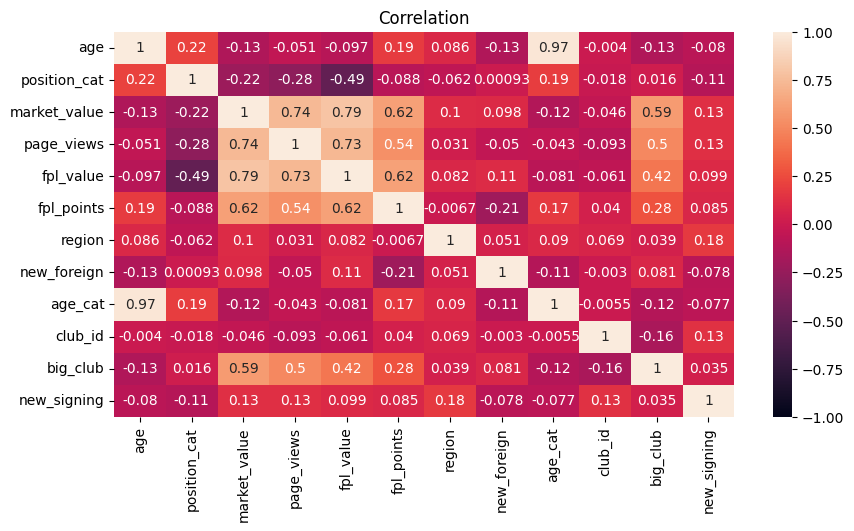

In [147]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(numeric_only=True),annot=True,vmin=-1,vmax=1)
plt.title("Correlation")

In [148]:
# Correlation of independent variables with dependent variables.

Text(0.5, 1.0, 'Correlation')

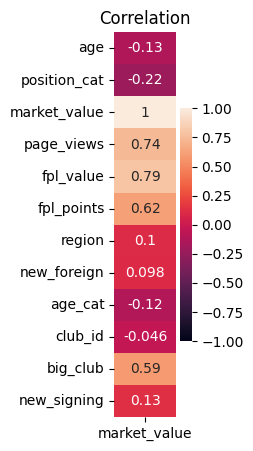

In [149]:
plt.figure(figsize=(1,5))
sns.heatmap(df.corr(numeric_only=True)[["market_value"]],annot=True,vmin=-1,vmax=1)
plt.title("Correlation")

In [150]:
# does position category has realtion with market value

C:\Users\Abhishek\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Abhishek\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Abhishek\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Abhishek\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_d

<Axes: xlabel='position', ylabel='market_value'>

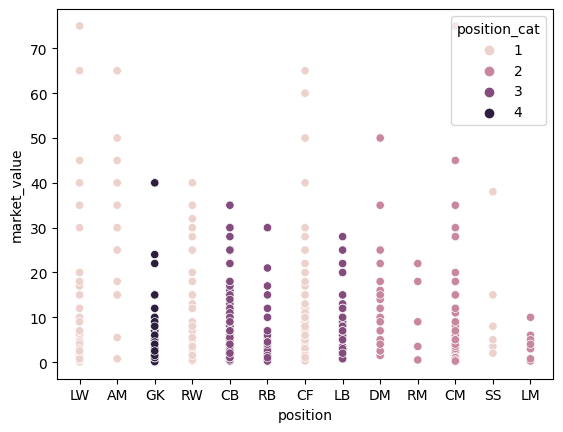

In [151]:
sns.scatterplot(df,x = "position",y = "market_value", hue = "position_cat")

C:\Users\Abhishek\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Abhishek\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='position_cat', ylabel='market_value'>

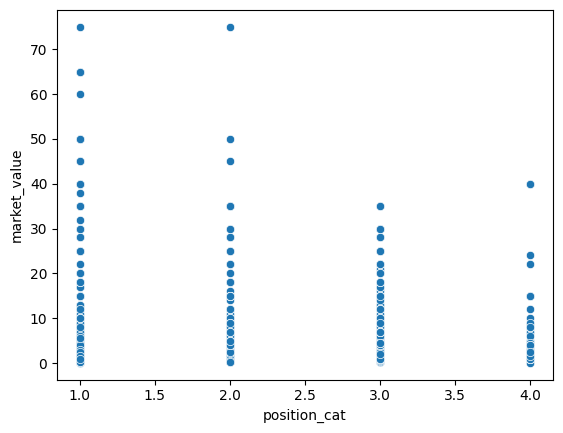

In [152]:
sns.scatterplot(df,x = "position_cat",y = "market_value" )

###  Feature Engineering

In [153]:
# gathering those columns which are required for analysis.

In [154]:
# to drop columns
# name ,age , position_cat , nationality, club_id

In [155]:
new_df = df.drop(["name","age","position_cat","nationality","club_id"],axis = 1)
new_df.head()

club position  market_value  page_views  fpl_value fpl_sel  fpl_points  \
0  Arsenal       LW          65.0        4329       12.0  17.10%         264   
1  Arsenal       AM          50.0        4395        9.5   5.60%         167   
2  Arsenal       GK           7.0        1529        5.5   5.90%         134   
3  Arsenal       RW          20.0        2393        7.5   1.50%         122   
4  Arsenal       CB          22.0         912        6.0   0.70%         121   

   region  new_foreign  age_cat  big_club  new_signing  
0     3.0            0        4         1            0  
1     2.0            0        4         1            0  
2     2.0            0        6         1            0  
3     1.0            0        4         1            0  
4     2.0            0        4         1            0

In [156]:
# fpl_sel is an object it has percentage sign 
# converting it to int.

In [157]:
new_df["fpl_sel"] = new_df["fpl_sel"].str.replace("%","")  # replacing "%" with ""

In [158]:
new_df["fpl_sel"] = new_df["fpl_sel"].astype(float)

In [159]:
new_df["fpl_sel"].info()

<class 'pandas.core.series.Series'>
Index: 460 entries, 0 to 460
Series name: fpl_sel
Non-Null Count  Dtype  
--------------  -----  
460 non-null    float64
dtypes: float64(1)
memory usage: 7.2 KB


In [160]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 460 entries, 0 to 460
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   club          460 non-null    object 
 1   position      460 non-null    object 
 2   market_value  460 non-null    float64
 3   page_views    460 non-null    int64  
 4   fpl_value     460 non-null    float64
 5   fpl_sel       460 non-null    float64
 6   fpl_points    460 non-null    int64  
 7   region        460 non-null    float64
 8   new_foreign   460 non-null    int64  
 9   age_cat       460 non-null    int64  
 10  big_club      460 non-null    int64  
 11  new_signing   460 non-null    int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 46.7+ KB


In [161]:
# boxplot to check outliers.

<Axes: >

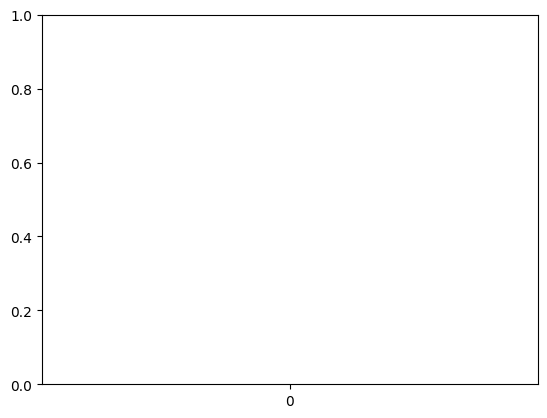

In [162]:
sns.boxplot()

### Model Building

In [163]:
# train test split
x = new_df.drop(["market_value"],axis =1)
y = new_df["market_value"]

In [164]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=4)

In [165]:
from sklearn.preprocessing import OneHotEncoder

In [166]:
ohe = OneHotEncoder()

In [167]:
x.columns

Index(['club', 'position', 'page_views', 'fpl_value', 'fpl_sel', 'fpl_points',
       'region', 'new_foreign', 'age_cat', 'big_club', 'new_signing'],
      dtype='object')

In [168]:
ohe.fit(x[["club","position"]])

OneHotEncoder()

In [169]:
ohe.categories_

[array(['Arsenal', 'Bournemouth', 'Brighton+and+Hove', 'Burnley',
        'Chelsea', 'Crystal+Palace', 'Everton', 'Huddersfield',
        'Leicester+City', 'Liverpool', 'Manchester+City',
        'Manchester+United', 'Newcastle+United', 'Southampton',
        'Stoke+City', 'Swansea', 'Tottenham', 'Watford', 'West+Brom',
        'West+Ham'], dtype=object),
 array(['AM', 'CB', 'CF', 'CM', 'DM', 'GK', 'LB', 'LM', 'LW', 'RB', 'RM',
        'RW', 'SS'], dtype=object)]

In [170]:
#column transformer

In [171]:
from sklearn.compose import make_column_transformer 

In [172]:
from sklearn.compose import ColumnTransformer

In [173]:
# transformer = ColumnTransformer(transformers=[ ("ohe",OneHotEncoder(sparse=False),["club","position"])],remainder="passthrough")
# transformer.fit_transform(x_train)

In [174]:
col_trans = make_column_transformer((OneHotEncoder(categories= ohe.categories_) , 
                                    [0,1]) , remainder= 'passthrough')

In [175]:
lr = LinearRegression()

In [176]:
from sklearn.pipeline import make_pipeline

In [177]:
pipe = make_pipeline(col_trans,lr)

In [178]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Arsenal', 'Bournemouth', 'Brighton+and+Hove', 'Burnley',
       'Chelsea', 'Crystal+Palace', 'Everton', 'Huddersfield',
       'Leicester+City', 'Liverpool', 'Manchester+City',
       'Manchester+United', 'Newcastle+United', 'Southampton',
       'Stoke+City', 'Swansea', 'Tottenham', 'Watford', 'West+Brom',
       'West+Ham'], dtype=object),
                                                                            array(['AM', 'CB', 'CF', 'CM', 'DM', 'GK', 'LB', 'LM', 'LW', 'RB', 'RM',
       'RW', 'SS'], dtype=object)]),
                                                  [0, 1])])),
                ('linearregression', LinearRegression())])

In [179]:
y_pred_test = pipe.predict(x_test)
# y_pred_test

In [180]:
y_pred_train = pipe.predict(x_train)
# y_pred_train

In [181]:
from sklearn.metrics import r2_score

In [182]:
# testing accuracy

In [183]:
r_two_score = r2_score(y_test,y_pred_test)
r_two_score

0.8284387103294388

In [184]:
# trainig accuracy

In [185]:
r_two_score = r2_score(y_train,y_pred_train)
r_two_score

0.8008637414154769

###  make pickle file

In [186]:
import pickle
import json

In [187]:
with open("pipeline.pkl","wb") as f:
    pickle.dump(pipe,f)

In [188]:
with open('LinearModel.pkl' , 'wb') as f:
    pickle.dump(lr,f)

In [189]:
with open("OneHotEncoder.pkl" , 'wb') as f:
    pickle.dump(ohe , f)